## The mighty EDA notebook

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import libraries
import os, sys
sys.path.insert(0,"..") 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
#import nibabel as nib
import numpy as np

from dataloader.dataloader import ImageCLEFDataset, Dataloder

ROOT_DIR = os.path.abspath("../")
DATASET_PATH = os.path.join(ROOT_DIR, "dataset")
print(os.listdir(DATASET_PATH))

Using TensorFlow backend.


['subset_ct_scans', '.DS_Store', '5d524928-af8d-4a94-af63-bcffbb97ed47_TrainSet_add_metaData.csv', 'masks1', '.ipynb_checkpoints', '4231cdb3-af46-4674-be08-95b904a62093_TrainSet_metaData.csv']


### Helpers

In [3]:
def plot_seq(data, name):
    
    a, b = 3, 20
    data = np.reshape(data, (a, b, 128, 128))
    test_data = data
    r, c = test_data.shape[0], test_data.shape[1]

    cmaps = [['viridis', 'binary'], ['plasma', 'coolwarm'], ['Greens', 'copper']]

    heights = [a[0].shape[0] for a in test_data]
    widths = [a.shape[1] for a in test_data[0]]

    fig_width = 22.  # inches
    fig_height = fig_width * sum(heights) / sum(widths)

    f, axarr = plt.subplots(r,c, figsize=(fig_width, fig_height),
          gridspec_kw={'height_ratios':heights})

    for i in range(r):
        for j in range(c):
            axarr[i, j].imshow(test_data[i][j], cmap='gray')
            axarr[i, j].axis('off')
    
    plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
    #plt.savefig('{}/{}.png'.format(log_path, name), dpi=200)
    plt.show()

## Read labels

In [4]:
dt = pd.read_csv(os.path.join(DATASET_PATH, '4231cdb3-af46-4674-be08-95b904a62093_TrainSet_metaData.csv'))
dt.head()

,FileName,TypeOfTB
0,TRN_0001.nii.gz,1
1,TRN_0002.nii.gz,1
2,TRN_0003.nii.gz,1
3,TRN_0004.nii.gz,1
4,TRN_0005.nii.gz,1


In [5]:
# Labels
labels = dt[["TypeOfTB"]].values

### Five types: (1) Infiltrative, (2) Focal, (3) Tuberculoma, (4) Miliary, (5) Fibro-cavernous.


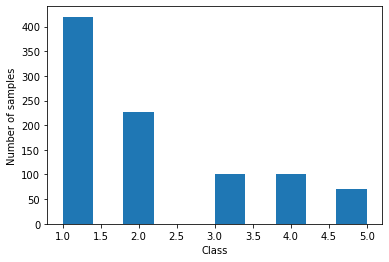

In [6]:
plt.hist(labels)
plt.ylabel("Number of samples")
plt.xlabel("Class")
plt.show()

In [7]:
len(labels)

917

In [8]:
labels.shape

(917, 1)

### Some images

In [9]:
# Raw data path
subset_train_vols_path = os.path.join(DATASET_PATH, 'subset_ct_scans/')
subset_train_vols = sorted(os.listdir(subset_train_vols_path))

subset_train_vols.remove('.DS_Store')

len(subset_train_vols)
subset_train_vols[:5]

['TRN_0001.nii.gz',
 'TRN_0002.nii.gz',
 'TRN_0003.nii.gz',
 'TRN_0004.nii.gz',
 'TRN_0005.nii.gz']

In [10]:
count = 0
vol_path = os.path.join(subset_train_vols_path + subset_train_vols[0])
vol_path

'/Users/hasibzunair/tbt-classification/dataset/subset_ct_scans/TRN_0001.nii.gz'

In [11]:
# DEST_PATH = os.path.join(DATASET_PATH, "scans")

# if not os.path.exists(DEST_PATH):
#     os.mkdir(os.path.join(DEST_PATH))

# print(DEST_PATH)

In [12]:
#ct = 1
#for name in subset_train_vols[:10]:
#    vol_path = os.path.join(subset_train_vols_path + name)
#    # Read data
#    img = nib.load(vol_path)
#    img = np.asanyarray(img.dataobj)
#    img = scale_volume(img)
#    np.save("{}/{}.npy".format(DEST_PATH, ct), img)
#    ct+=1

### Define train val seys

In [13]:
# ct data path, csv file path
train_dataset = ImageCLEFDataset(DATASET_PATH+ '/subset_ct_scans/',
                           DATASET_PATH + '/4231cdb3-af46-4674-be08-95b904a62093_TrainSet_metaData.csv', flag="train")

Training data: 4
Validation data: 1


In [14]:
test_dataset = ImageCLEFDataset(DATASET_PATH+ '/subset_ct_scans/',
                           DATASET_PATH + '/4231cdb3-af46-4674-be08-95b904a62093_TrainSet_metaData.csv', flag="test")

Training data: 4
Validation data: 1


### Visualize scan

In [15]:
image, gt = train_dataset[2] 
image.shape, gt.shape

((64, 128, 128, 1), (5,))

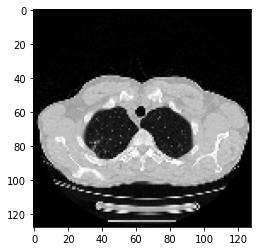

In [16]:
image = np.squeeze(image)
#plt.imshow(image[:,:,55], cmap='gray') # channels last
plt.imshow(image[55], cmap='gray') # channels first

In [17]:
dummy = image[:60]
dummy.shape

(60, 128, 128)

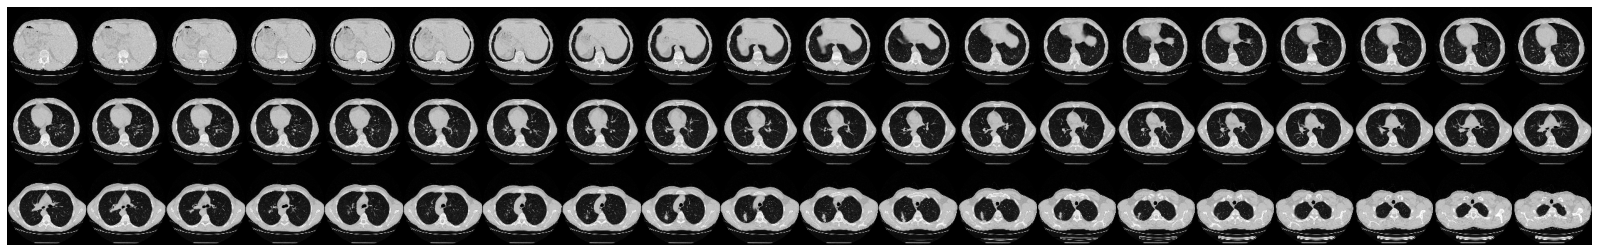

In [18]:
plot_seq(dummy, "full")

### Read data

In [19]:
train_dataloader = Dataloder(train_dataset, batch_size=2, shuffle=True)

In [20]:
# Test train loader
x , y = next(iter(train_dataloader))
print(x.shape, y.shape)

(2, 64, 128, 128, 1) (2, 5)


In [21]:
len(train_dataloader)

2

In [22]:
for batch_idx, (features, targets) in enumerate(train_dataloader):
    print(batch_idx, features.shape, targets.shape)

0 (2, 64, 128, 128, 1) (2, 5)
1 (2, 64, 128, 128, 1) (2, 5)


### Sanity check

Labels is [0. 1. 0. 0. 0.]


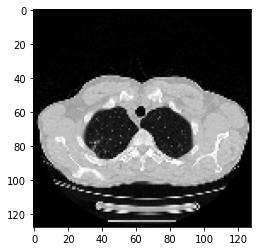

In [23]:
image = features[0]
image = np.squeeze(image)
print("Labels is {}".format(targets[0]))
#plt.imshow(image[:,:,55], cmap='gray') # channels last
plt.imshow(image[55], cmap='gray') # channels first

In [24]:
test_dataloader = Dataloder(test_dataset, batch_size=1, shuffle=False)

In [25]:
for batch_idx, (features, targets) in enumerate(test_dataloader):
    print(batch_idx, features.shape, targets.shape)

0 (1, 64, 128, 128, 1) (1, 5)
